In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/BadWizard/anaconda3/envs/theano/lib/python3.5/site-packages/matplotlib/style/core.py:197: UserWarning: In /Users/BadWizard/.matplotlib/stylelib/my_custom_style.mplstyle: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(message)


In [2]:
import pymc3 as pm3


# Example 1. Simple Linear regression with one independent variabes

In [3]:
N = 10000
x = 10 + 2*np.random.randn(N)
y = 5 + x + np.random.randn(N)
df = pd.DataFrame({'y':y, 'x':x})
df['constant'] = 1

df.head()

,x,y,constant
0,10.025222,15.173054,1
1,11.461675,15.495137,1
2,9.573432,14.204124,1
3,7.596998,13.117231,1
4,13.004164,17.961468,1


In [4]:
with pm3.Model() as model:
    b0 = pm3.Flat('constant',testval=5)
    b1 = pm3.Flat('x',testval=1)
    sigma = pm3.Flat('sigma',testval = 1)
    mu = b0 + b1 * df.x
    like = pm3.Normal('like',mu = mu, sd=sigma, observed=df.y)

In [5]:
with model:
    # obtain MLE 
    beta_mle = pm3.find_MAP()
    # obtain hessian at MAP
    hessian = pm3.approx_hessian(beta_mle)

         Current function value: 14080.925167
         Iterations: 7
         Function evaluations: 124
         Gradient evaluations: 111


In [6]:
se_1 = np.sqrt(np.diag(np.linalg.inv(hessian)))    
se = se_1[::-1]

In [7]:
se

array([ 0.04987087,  0.00491046,  0.00699479])

In [8]:
beta_mle['x']

array(1.0036737555457917)

In [9]:
b = np.array([beta_mle['constant'], beta_mle['x'], beta_mle['sigma']])

In [10]:
results_pymc = pd.DataFrame({'parameters':b,'std err':se})
results_pymc.index=['Intercept','Slope','Sigma']   
results_pymc.head()

,parameters,std err
Intercept,4.947270,0.049871
Slope,1.003674,0.004910
Sigma,0.989213,0.006995


# Example 2. Multiple linear regression

In [11]:
np.random.seed(314)
N = 100
alpha_real = 2.5
beta_real = [0.9, 1.5]
eps_real = np.random.normal(0, 0.5, size = N)

In [12]:
X = np.array([np.random.normal(i, j, N) for i,j in zip([10, 2], [1, 1.5])])

In [13]:
print('The mean of X is {}'.format(np.mean(X,axis=1)))
print('The std. of X is {}'.format(np.std(X,axis=1)))

The mean of X is [ 10.1291923    1.99519902]
The std. of X is [ 1.08956178  1.4769449 ]


In [14]:
X_mean = X.mean(axis=1, keepdims=True)
X_mean

array([[ 10.1291923 ],
       [  1.99519902]])

In [15]:
X_centered = X - X_mean

In [16]:
X_centered.mean(axis=1)

array([  2.75335310e-16,   2.04281037e-16])

In [17]:
X.T.dot(beta_real)

array([ 14.22551158,  11.88323137,   9.68809989,  12.30786374,
        12.01203882,   8.95038951,  12.96247074,  12.38112058,
        13.79220983,  12.67587645,  12.2940463 ,   9.42982196,
        11.04063803,  13.38665841,  10.92188687,  16.37840986,
        14.71559503,  13.71455417,  12.16694005,  13.7560264 ,
         9.9851754 ,   9.77787031,  12.43127264,  12.12351027,
        13.34543507,  14.9101143 ,  10.55871973,   7.85681305,
        15.24495866,  13.86486877,  12.68487399,  12.37965363,
        10.14423681,  12.27428314,  13.0939399 ,  12.62083306,
        12.4741106 ,   9.79035281,  10.55420149,  14.11057435,
        14.55706127,  11.5365302 ,  11.46349024,   4.8633872 ,
         8.9375993 ,   8.5586211 ,   9.16609986,  18.32771603,
        11.19781097,  12.26043546,  12.654817  ,   9.27079582,
        16.44721035,  10.72871152,  12.04813346,   9.42967892,
        13.35721015,  14.47114645,   9.64606016,  11.75414549,
        13.6890802 ,  10.73638525,   9.86763997,  15.55

In [18]:
np.dot(beta_real, X)

array([ 14.22551158,  11.88323137,   9.68809989,  12.30786374,
        12.01203882,   8.95038951,  12.96247074,  12.38112058,
        13.79220983,  12.67587645,  12.2940463 ,   9.42982196,
        11.04063803,  13.38665841,  10.92188687,  16.37840986,
        14.71559503,  13.71455417,  12.16694005,  13.7560264 ,
         9.9851754 ,   9.77787031,  12.43127264,  12.12351027,
        13.34543507,  14.9101143 ,  10.55871973,   7.85681305,
        15.24495866,  13.86486877,  12.68487399,  12.37965363,
        10.14423681,  12.27428314,  13.0939399 ,  12.62083306,
        12.4741106 ,   9.79035281,  10.55420149,  14.11057435,
        14.55706127,  11.5365302 ,  11.46349024,   4.8633872 ,
         8.9375993 ,   8.5586211 ,   9.16609986,  18.32771603,
        11.19781097,  12.26043546,  12.654817  ,   9.27079582,
        16.44721035,  10.72871152,  12.04813346,   9.42967892,
        13.35721015,  14.47114645,   9.64606016,  11.75414549,
        13.6890802 ,  10.73638525,   9.86763997,  15.55

In [19]:
np.exp(alpha_real)

12.182493960703473

In [20]:
alpha_real

2.5

In [21]:
y = alpha_real + np.dot(beta_real, X) + eps_real

In [22]:
def scatter_plot(x, y):
    plt.figure(figsize=(10, 10))
    for idx, x_i in enumerate(x):
        plt.subplot(2,2,idx+1)
        plt.scatter(x_i, y)
        plt.xlabel("$x_{}$".format(idx), fontsize = 16)
        plt.ylabel("$y$", rotation=0, fontsize = 16)
        
    plt.subplot(2,2,idx+2)
    plt.scatter(x[0], x[1])
    plt.xlabel("$x_{}$".format(idx-1), fontsize = 16)
    plt.ylabel("$x_{}$".format(idx), rotation=0, fontsize = 16)
    
        
            

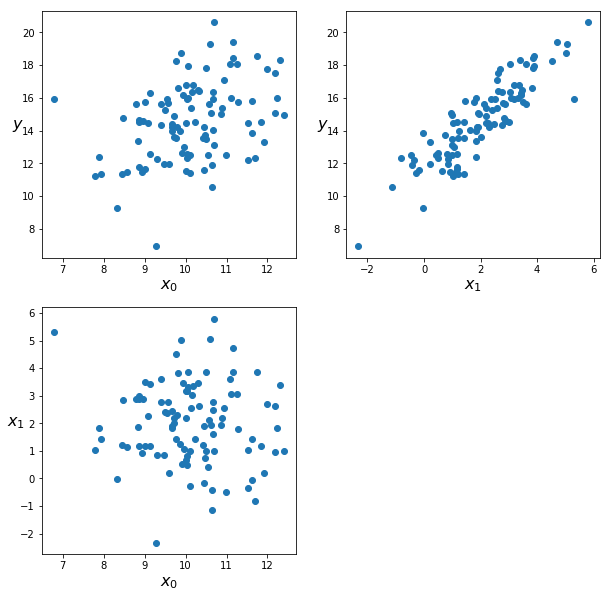

In [23]:
scatter_plot(X, y)

In [24]:
with pm3.Model() as model_mlr:
    alpha_tmp = pm3.Normal('alpha_tmp', mu=0, sd = 10)
    beta = pm3.Normal('$beta$', mu=0, sd = 1, shape = 2)
    epsilon = pm3.HalfCauchy('$epsilon$', 5)
    
    mu = alpha_tmp + pm3.math.dot(beta, X_centered)
    alpha = pm3.Deterministic('$alpha$', alpha_tmp - pm3.math.dot(beta, X_mean))
    y_pred = pm3.Normal('y_pred', mu=mu, sd=epsilon, observed = y)
    
    start = pm3.find_MAP()
    step = pm3.NUTS(scaling=start)
    trace_mlr = pm3.sample(5000, step=step, start=start )

Optimization terminated successfully.
         Current function value: 74.986175
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31


100%|██████████| 5500/5500 [00:05<00:00, 1045.29it/s]


In [25]:
trace_mlr.varnames

['alpha_tmp', '$beta$', '$epsilon$_log__', '$epsilon$', '$alpha$']

''

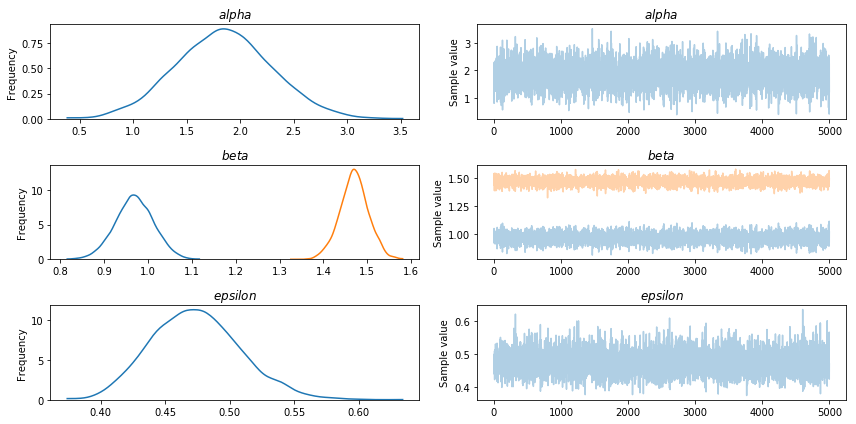

In [26]:
varnames = ['$alpha$','$beta$', '$epsilon$']
pm3.traceplot(trace_mlr, varnames)
;

In [27]:
start['$beta$']

array([ 0.96887982,  1.47000984])

In [28]:
start['$beta$']

array([ 0.96887982,  1.47000984])